In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import glob
cm = 1/2.54

In [2]:
r_00005 = [0.70, 0.80, 0.82, 0.84, 0.86, 0.88, 0.90, 0.92, 0.94, 0.96, 0.98, 1.00] #==========
Ts00005 = 0.0005

In [3]:
act_lyf001 = []; def_lyf001 = []
act_lyf0001 = []; def_lyf0001 = []
act_lyf00001 = []; def_lyf00001 = []
act_lyf00005 = []; def_lyf00005 = []
act_lyf0042 = []; def_lyf0042 = []
  
for r  in [0.70, 0.80, 0.82, 0.84, 0.86, 0.88, 0.90, 0.92, 0.94, 0.96, 0.98, 1.00]:
    act_lyf_0042_ = pd.read_csv('data0042/Ts0.0005_S27T5R'+str(format(r,'.2f'))+'act_with_lyf.csv', names=['lyf'])
    act_lyf0042.append(act_lyf_0042_)
    try:
        def_lyf_0042_ = pd.read_csv('data0042/Ts0.0005_S27T5R'+str(format(r,'.2f'))+'def_with_lyf.csv', names=['lyf'])
        def_lyf0042.append(def_lyf_0042_)
    except:
        pass; #print('passed: '+str(r))

In [4]:
act_0042 = []; act_0042_m = []; act_0042_d = []; act_0042_dm = []
def_0042 = []; def_0042_m = []; def_0042_d = []; def_0042_dm = []

for i in range(12):
    act_0042 = Ts00005*act_lyf0042[i]['lyf']
    act_0042_m.append(act_0042.mean())
    act_0042_d.append(act_0042.std())
    act_0042_dm.append(np.std(act_0042, ddof=1) / np.sqrt(np.size(act_0042)))
    #--------------------------------
    def_0042 = Ts00005*def_lyf0042[i]['lyf']
    def_0042_m.append(def_0042.mean())
    def_0042_d.append(def_0042.std())
    def_0042_dm.append(np.std(def_0042, ddof=1) / np.sqrt(np.size(def_0042)))
    #--------------------------------

/home/nitta/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


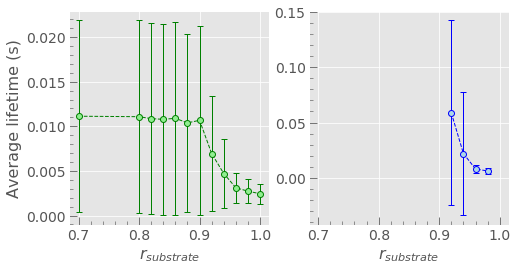

In [5]:

fig,ax = plt.subplots(1,2,figsize=(20*cm,10*cm), sharex=True)

# ax[0].plot(r_00005,act_00005_m, linestyle='--', linewidth=1, color='green', marker='o', markerfacecolor='lightgreen', label='Ts = 0.0005')
ax[0].errorbar(r_00005,act_0042_m,act_0042_d, linestyle='--', linewidth=1, \
               color='green', capsize=3, marker='o', markerfacecolor='lightgreen', label='Ts = 0.0005')

ax[0].set_xlabel('$r_{substrate}$', fontsize=16)
ax[0].set_ylabel('Average lifetime (s)', fontsize=16)
#ax[0].set_yticks(np.arange(0,0.021,0.005))
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, which='minor', labelsize=14)

# ax[1].plot(r_00005,def_00005_m, linestyle='--', linewidth=1, color='blue', marker='o', markerfacecolor='lightblue', label='Ts = 0.0005')

y_n = np.array(def_0042_m)
#y_n[np.isnan(y_n)] = 0  # don't remove NaN

ax[1].errorbar(r_00005[7:],y_n[7:],def_0042_d[7:], linestyle='--', linewidth=1, color='blue', \
               marker='o', capsize=3, markerfacecolor='lightblue', label='Ts = 0.0005')

ax[1].set_xlabel('$r_{substrate}$', fontsize=16)
#ax[1].set_yticks(np.arange(0,0.081,0.02))
ax[1].set_xticks(np.arange(0.70,1.01,0.1))
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, which='minor', labelsize=14)

#=============

# plt.savefig('fig/lyftym_act_def-0042-std.pdf', format="pdf", bbox_inches="tight")
# plt.savefig('fig/lyftym_act_def-0042-std.svg', format="svg", bbox_inches="tight", dpi=700)
# plt.savefig('fig/lyftym_act_def-0042-std.png', format="png", bbox_inches="tight", dpi=700)

plt.show()

In [6]:
import subprocess
subprocess.call('inkscape fig/lyftym_act_def-0042-std.svg -M fig/lyftym_act_def-0042-std.emf', shell=True)

0

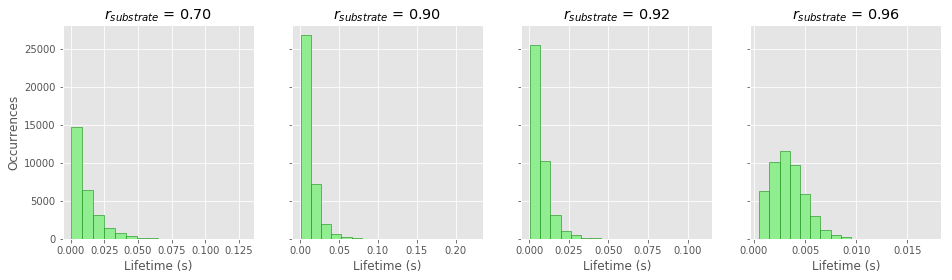

In [7]:
fig,ax = plt.subplots(1,4,figsize=(40*cm,10*cm), sharey=True)

color="lightgreen"

bins = np.arange(0,0.0751,0.002)

ax[0].hist(act_lyf0042[0]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='green') # , color=color
ax[0].set_title('$r_{substrate}$ = 0.70')
ax[0].set_ylabel('Occurrences')
ax[0].set_xlabel('Lifetime (s)')
#ax[0].set_xticks(np.arange(0,0.0751,0.025))
ax[1].hist(act_lyf0042[6]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='green') 
ax[1].set_title('$r_{substrate}$ = 0.90')
ax[1].set_xlabel('Lifetime (s)')
ax[2].hist(act_lyf0042[7]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='green') 
ax[2].set_title('$r_{substrate}$ = 0.92')
ax[2].set_xlabel('Lifetime (s)')
ax[3].hist(act_lyf0042[9]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='green') 
ax[3].set_title('$r_{substrate}$ = 0.96')
ax[3].set_xlabel('Lifetime (s)')

#=============

# plt.savefig('fig/lyftym_hist_act_v2-0042-sturges.pdf', format="pdf", bbox_inches="tight")
# plt.savefig('fig/lyftym_hist_act_v2-0042-sturges.svg', format="svg", bbox_inches="tight")
# plt.savefig('fig/lyftym_hist_act_v2-0042-sturges.png', format="png", bbox_inches="tight", dpi=700)

plt.show()

In [8]:
import subprocess
subprocess.call('inkscape fig/lyftym_hist_act_v2-0042-sturges.svg -M fig/lyftym_hist_act_v2-0042-sturges.emf', shell=True)

0

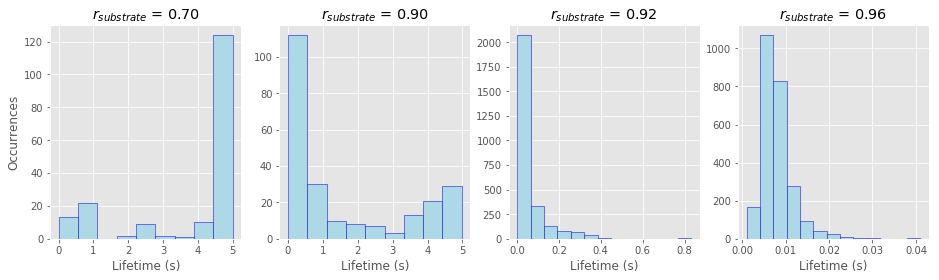

In [9]:
fig,ax = plt.subplots(1,4,figsize=(40*cm,10*cm))#, sharey=True)

color="lightblue"

bins = np.arange(0,5,0.125)

ax[0].hist(def_lyf0042[0]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='blue') # , color=color
ax[0].set_title('$r_{substrate}$ = 0.70')
ax[0].set_ylabel('Occurrences')
ax[0].set_xlabel('Lifetime (s)')
#ax[0].set_xticks(np.arange(0,0.0751,0.025))
ax[1].hist(def_lyf0042[6]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='blue') 
ax[1].set_title('$r_{substrate}$ = 0.90')
ax[1].set_xlabel('Lifetime (s)')

ax[2].hist(def_lyf0042[7]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='blue') 
ax[2].set_title('$r_{substrate}$ = 0.92')
ax[2].set_xlabel('Lifetime (s)')
ax[3].hist(def_lyf0042[9]['lyf']*Ts00005, bins='sturges', color=color, edgecolor='blue') 
ax[3].set_title('$r_{substrate}$ = 0.96')
ax[3].set_xlabel('Lifetime (s)')

# plt.savefig('fig/lyftym_hist_def_v2-0042-sturges.pdf', format="pdf", bbox_inches="tight")
# plt.savefig('fig/lyftym_hist_def_v2-0042-sturges.svg', format="svg", bbox_inches="tight")
# plt.savefig('fig/lyftym_hist_def_v2-0042-sturges.png', format="png", bbox_inches="tight", dpi=700)

plt.show()

In [10]:
import subprocess
subprocess.call('inkscape fig/lyftym_hist_def_v2-0042-sturges.svg -M fig/lyftym_hist_def_v2-0042-sturges.emf', shell=True)

0